In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('accident_data.csv')
data = data.drop('Unnamed: 0', axis = 1)
data

,state,city,county,year,day_of_week,hospital,lighting,population_type,weather,fatalities
0,Utah,EAST CARBON CITY,CARBON (7),2022,Sunday,0,Dark - Not Lighted,Rural,Clear,1
1,Utah,TOOELE,TOOELE (45),2022,Friday,0,Dark - Not Lighted,Urban,Clear,1
2,Utah,SALT LAKE CITY,SALT LAKE (35),2022,Tuesday,0,Dark - Lighted,Urban,Cloudy,1
3,Utah,ROY,WEBER (57),2022,Thursday,1,Daylight,Urban,Rain,1
4,Utah,OGDEN,WEBER (57),2022,Tuesday,1,Dark - Not Lighted,Urban,Clear,1
...,...,...,...,...,...,...,...,...,...,...
460,Utah,NAPLES,UINTAH (47),2022,Friday,0,Dark - Not Lighted,Rural,Clear,1
461,Utah,HURRICANE,WASHINGTON (53),2022,Saturday,1,Dark - Lighted,Urban,Clear,1
462,Utah,THOMPSON SPRINGS,GRAND (19),2022,Friday,0,Dark - Not Lighted,Rural,Clear,1
463,Utah,NORTH SALT LAKE,DAVIS (11),2022,Wednesday,1,Daylight,Urban,Rain,1


In [128]:
summary_stats = {
    'Observations': data['fatalities'].count(),
    'Sum': data['fatalities'].sum(),
    'Mean': data['fatalities'].mean(),
    'Min': data['fatalities'].min(),
    'Max': data['fatalities'].max(),
    'Std Dev': data['fatalities'].std(),
    'Median': data['fatalities'].median(),
    'Skewness': data['fatalities'].skew()
}

summary_df = pd.DataFrame(summary_stats, index=[0])
summary_df

,Observations,Sum,Mean,Min,Max,Std Dev,Median,Skewness
0,465,498,1.070968,1,2,0.257047,1.0,3.352575


In [ ]:
summary_df.to_

In [ ]:
city_counts = data['city'].value_counts()
county_counts = data['county'].value_counts()
dow_counts = data['day_of_week'].value_counts()
hosp_counts = data['hospital'].value_counts()
light_counts = data['lighting'].value_counts()
pop_counts = data['population_type'].value_counts()
weather_counts = data['weather'].value_counts()
fatal_count = data['fatalities'].value_counts()

In [ ]:
city_df = pd.DataFrame(city_counts)
city_df.head(10)

,count
city,
SALT LAKE CITY,57
Other,21
WEST VALLEY CITY,15
OGDEN,13
DRAPER,13
ST. GEORGE,10
SANDY CITY,10
LEHI,10
MURRAY,10


In [ ]:
county_df = pd.DataFrame(county_counts)
county_df.head(10)

,count
county,
SALT LAKE (35),142
UTAH (49),56
WEBER (57),38
DAVIS (11),30
WASHINGTON (53),27
TOOELE (45),24
GRAND (19),14
SUMMIT (43),12
WASATCH (51),11


In [110]:
dow_df = pd.DataFrame(dow_counts)
dow_df

,count
day_of_week,
Saturday,93
Friday,76
Monday,66
Tuesday,64
Wednesday,61
Thursday,59
Sunday,46


In [111]:
hosp_df = pd.DataFrame(hosp_counts)
hosp_df

,count
hospital,
1,283
0,182


In [112]:
light_df = pd.DataFrame(light_counts)
light_df

,count
lighting,
Daylight,259
Dark - Not Lighted,116
Dark - Lighted,73
Dawn,11
Dusk,6


In [113]:
pop_df = pd.DataFrame(pop_counts)
pop_df

,count
population_type,
Urban,309
Rural,156


In [114]:
weather_df = pd.DataFrame(weather_counts)
weather_df

,count
weather,
Clear,337
Cloudy,91
Rain,20
Snow,6
Severe Crosswinds,6
"Fog, Smog, Smoke",2
Blowing Snow,2
Sleet or Hail,1


In [118]:
fatal_df = pd.DataFrame(fatal_count)
fatal_df

,count
fatalities,
1,432
2,33


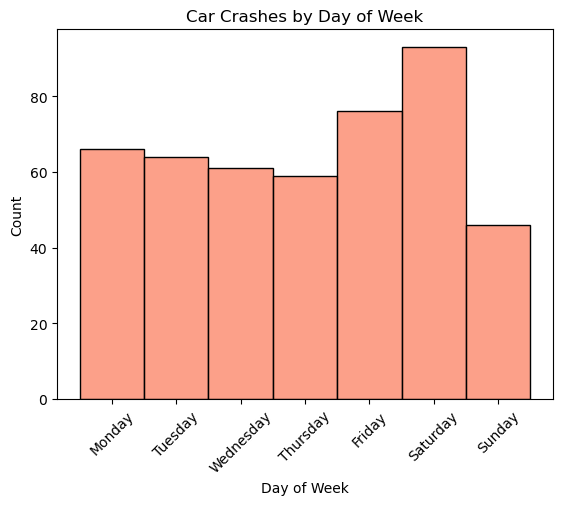

In [71]:
dow_counts = data['day_of_week'].value_counts()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data['day_of_week'] = pd.Categorical(data['day_of_week'], categories = order, ordered = True)

color = sns.color_palette('Reds')[2]

sns.histplot(data['day_of_week'], color = color)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Car Crashes by Day of Week')
plt.xticks(rotation=45)
plt.show()

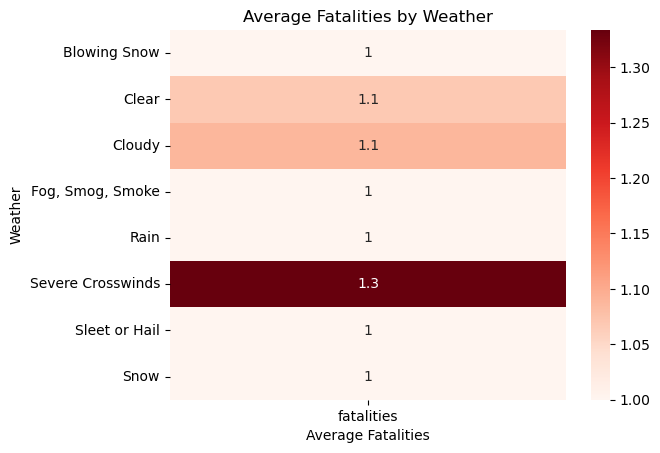

In [74]:
pivot_table = data.groupby('weather')['fatalities'].mean().reset_index()
pivot_table = pivot_table.set_index('weather')

sns.heatmap(pivot_table, annot=True, cmap='Reds')
plt.xlabel('Average Fatalities')
plt.ylabel('Weather')
plt.title('Average Fatalities by Weather')
plt.show()


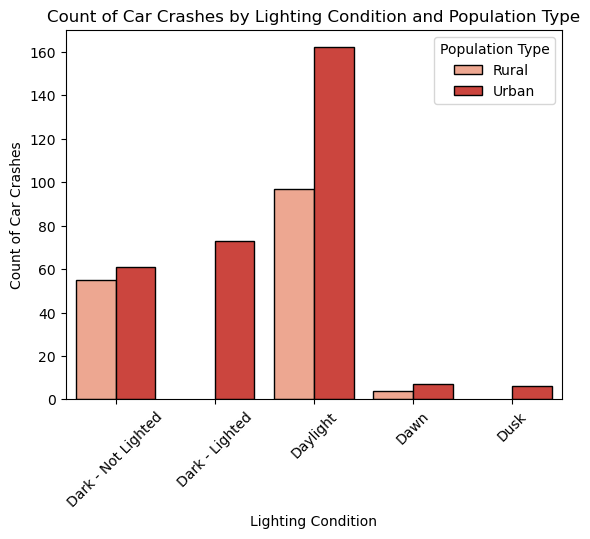

In [76]:
sns.countplot(x = 'lighting', hue = 'population_type', data = data, palette = 'Reds', edgecolor = 'black')
plt.xlabel('Lighting Condition')
plt.ylabel('Count of Car Crashes')
plt.title('Count of Car Crashes by Lighting Condition and Population Type')
plt.xticks(rotation=45)
plt.legend(title='Population Type')
plt.show()